# Basic Data Exploration for BA Consult Group Project

Aims:
1. Combine and clean the three datasets I found into a single one for regression
2. Decide if to use a single region with year (30 rows max), or multiple regions (30 * 3 regions = 90 rows), which is better for regressions
    - Limitations due to different sampling methods, recent years uses a newer one
    - Lack of data, especially for SEA region waters + harder to split
    -

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1.1 Dataset 1 - Microplastic Concentration
Consist of 3 Portions:
1. Aggregate based on a single region and year
2. Aggregate based on a single region and year-month
3. Aggregate based on multiple regions and year

Chosen Regions:
1. US East Coast
2. Gulf of Mexico
3. US West Coast

#### 1.1.1 Aggregate based on a Single Region and (Year, Sampling Method)s

In [2]:
# Specify the 3 regions coordinates
REGIONS = {
    "US_EAST_COAST": {
        "lat_min": 25,
        "lat_max": 47,
        "lon_min": -82,
        "lon_max": -66
    },
    "GULF_OF_MEXICO": {
        "lat_min": 18,
        "lat_max": 31,
        "lon_min": -98,
        "lon_max": -80
    },
    "US_WEST_COAST": {
        # Bounding Box for US West 
        "lat_min": 32, 
        "lat_max": 49,
        "lon_min": -130, 
        "lon_max": -117
    },
}

# Load the Microplastic Dataset into a DF
microplastic_df = pd.read_csv("./datasets/marine_microplastic_ocean_global.csv")
microplastic_df.head()

,OBJECTID,Latitude (degree),Longitude (degree),Ocean,Region,Subregion,Country,State,Beach Location,Marine Setting,...,DOI,Organization,Keywords,NCEI Accession Number,NCEI Accession Link,Symbology,GlobalID,Sample Date,x,y
0,1,45.28,-60.29,Atlantic Ocean,NaN,NaN,NaN,NaN,NaN,Ocean water,...,https://doi.org/10.1126/science.1192321,Sea Education Association,SEA,211007,https://www.ncei.noaa.gov/access/metadata/land...,"Ocean Surface, Very Low, 0-0.0005 pieces/m3",2ce1d1d4-4231-4ab8-af74-0b7fbb1e028b,7/13/1989 12:00:00 AM,-60.29,45.28
1,2,40.93,-70.65,Atlantic Ocean,NaN,NaN,NaN,NaN,NaN,Ocean water,...,https://doi.org/10.1126/science.1192321,Sea Education Association,SEA,211007,https://www.ncei.noaa.gov/access/metadata/land...,"Ocean Surface, Low, 0.0005-0.005 pieces/m3",8e3c8426-5ab0-421e-abb2-6b90197ada7a,10/12/1989 12:00:00 AM,-70.65,40.93
2,3,40.93,-70.65,Atlantic Ocean,NaN,NaN,NaN,NaN,NaN,Ocean water,...,https://doi.org/10.1126/science.1192321,Sea Education Association,SEA,211007,https://www.ncei.noaa.gov/access/metadata/land...,"Ocean Surface, Low, 0.0005-0.005 pieces/m3",99bda337-9f0c-4f58-9960-8b00c1110a7c,10/12/1989 12:00:00 AM,-70.65,40.93
3,4,40.30,-69.77,Atlantic Ocean,NaN,NaN,NaN,NaN,NaN,Ocean water,...,https://doi.org/10.1126/science.1192321,Sea Education Association,SEA,211007,https://www.ncei.noaa.gov/access/metadata/land...,"Ocean Surface, Very Low, 0-0.0005 pieces/m3",1f20e926-2a84-4e42-8478-8a5af5aecacc,10/12/1989 12:00:00 AM,-69.77,40.30
4,5,39.88,-67.15,Atlantic Ocean,NaN,NaN,NaN,NaN,NaN,Ocean water,...,https://doi.org/10.1126/science.1192321,Sea Education Association,SEA,211007,https://www.ncei.noaa.gov/access/metadata/land...,"Ocean Surface, Very Low, 0-0.0005 pieces/m3",a0df6bee-9c60-4621-a0bc-3329e3f11720,10/15/1989 12:00:00 AM,-67.15,39.88


In [3]:
# Convert all the sample dates into Datetime objects
microplastic_df["Datetime"] = pd.to_datetime(
    microplastic_df["Sample Date"],
    errors="coerce"
)

# Extract the Year and Month as separate columns
microplastic_df["Year"] = microplastic_df["Datetime"].dt.year
# Create YearMonth column
microplastic_df["YearMonth"] = microplastic_df["Datetime"].dt.to_period("M")

# Print to seee
print("Unique YearMonth values:", microplastic_df["YearMonth"].nunique())
print("Min/Max:", microplastic_df["YearMonth"].min(), microplastic_df["YearMonth"].max())

Unique YearMonth values: 396
Min/Max: 1972-04 2023-02


/var/folders/w1/mvky9f4d4s19c7tj7wqmqyx00000gn/T/ipykernel_40540/896251586.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  microplastic_df["Datetime"] = pd.to_datetime(


In [4]:
# Format the sampling method correctly
microplastic_df["Sampling Method"] = (
    microplastic_df["Sampling Method"]
    .astype(str)
    .str.strip()
)

# Set the Microplastic Concentration correctly
microplastic_df["Microplastic_Concentration"] = pd.to_numeric(
    microplastic_df["Microplastics Measurement"],
    errors="coerce"
)

**1.US East Coast**

In [5]:
# Bounding Box for US East Coast
SELECTED_REGION = "US_EAST_COAST"
lat_min = REGIONS[SELECTED_REGION]["lat_min"]
lat_max = REGIONS[SELECTED_REGION]["lat_max"]
lon_min = REGIONS[SELECTED_REGION]["lon_min"]
lon_max = REGIONS[SELECTED_REGION]["lon_max"]

# Filter out the rows in the US East Coast
microplastic_df["Latitude (degree)"] = pd.to_numeric(microplastic_df["Latitude (degree)"], errors="coerce")
microplastic_df["Longitude (degree)"] = pd.to_numeric(microplastic_df["Longitude (degree)"], errors="coerce")

# Cretate a new df for east coast
us_east_df = microplastic_df[
    microplastic_df["Latitude (degree)"].between(lat_min, lat_max) &
    microplastic_df["Longitude (degree)"].between(lon_min, lon_max)
].copy()

# Drop missing values if they are missing year, sampling method and conc since we cant use
us_east_df = us_east_df.dropna(subset=["Year", "Sampling Method", "Microplastic_Concentration"])

# Aggregate based on (Year, Sampling Method) tuple
cleaned_us_east_df = (
    us_east_df
    .groupby(["Year", "Sampling Method"], as_index=False)
    .agg(
        Microplastic_Mean=("Microplastic_Concentration", "mean"),
        Microplastic_Median=("Microplastic_Concentration", "median"),
        Total_Samples=("Microplastic_Concentration", "size")
    )
    .sort_values(["Year", "Sampling Method"])
)


print(f"Results Summary (US East; 1 Region; (Year, Sampling Method) Aggregate)")
print("Number of microplastic_df Rows: ", len(microplastic_df))
print("Number of us_east_df Rows: ", len(us_east_df))
print("Number of cleaned_us_east_df Rows: ", len(cleaned_us_east_df))

Results Summary (US East; 1 Region; (Year, Sampling Method) Aggregate)
Number of microplastic_df Rows:  22530
Number of us_east_df Rows:  2263
Number of cleaned_us_east_df Rows:  32


**2. Gulf of Mexico**

In [6]:
# Bounding Box for GULF_OF_MEXICO
SELECTED_REGION = "GULF_OF_MEXICO"
lat_min = REGIONS[SELECTED_REGION]["lat_min"]
lat_max = REGIONS[SELECTED_REGION]["lat_max"]
lon_min = REGIONS[SELECTED_REGION]["lon_min"]
lon_max = REGIONS[SELECTED_REGION]["lon_max"]

# Filter out the rows in the GULF_OF_MEXICO
microplastic_df["Latitude (degree)"] = pd.to_numeric(microplastic_df["Latitude (degree)"], errors="coerce")
microplastic_df["Longitude (degree)"] = pd.to_numeric(microplastic_df["Longitude (degree)"], errors="coerce")

# Cretate a new df for GULF_OF_MEXICO
gulf_of_mexico_df = microplastic_df[
    microplastic_df["Latitude (degree)"].between(lat_min, lat_max) &
    microplastic_df["Longitude (degree)"].between(lon_min, lon_max)
].copy()

# Drop missing values if they are missing year, sampling method and conc since we cant use
gulf_of_mexico_df = gulf_of_mexico_df.dropna(subset=["Year", "Sampling Method", "Microplastic_Concentration"])

# Aggregate based on (Year, Sampling Method) tuple
cleaned_gulf_of_mexico_df = (
    gulf_of_mexico_df
    .groupby(["Year", "Sampling Method"], as_index=False)
    .agg(
        Microplastic_Mean=("Microplastic_Concentration", "mean"),
        Microplastic_Median=("Microplastic_Concentration", "median"),
        Total_Samples=("Microplastic_Concentration", "size")
    )
    .sort_values(["Year", "Sampling Method"])
)


print(f"Results Summary (GULF_OF_MEXICO; 1 Region; (Year, Sampling Method) Aggregate)")
print("Number of microplastic_df Rows: ", len(microplastic_df))
print("Number of gulf_of_mexico_df Rows: ", len(gulf_of_mexico_df))
print("Number of cleaned_gulf_of_mexico_df Rows: ", len(cleaned_gulf_of_mexico_df))

Results Summary (GULF_OF_MEXICO; 1 Region; (Year, Sampling Method) Aggregate)
Number of microplastic_df Rows:  22530
Number of gulf_of_mexico_df Rows:  769
Number of cleaned_gulf_of_mexico_df Rows:  28


**3.US West Coast**

In [7]:
# Bounding Box for US West Coast
SELECTED_REGION = "US_WEST_COAST"
lat_min = REGIONS[SELECTED_REGION]["lat_min"]
lat_max = REGIONS[SELECTED_REGION]["lat_max"]
lon_min = REGIONS[SELECTED_REGION]["lon_min"]
lon_max = REGIONS[SELECTED_REGION]["lon_max"]

# Filter out the rows in the US West Coast
microplastic_df["Latitude (degree)"] = pd.to_numeric(microplastic_df["Latitude (degree)"], errors="coerce")
microplastic_df["Longitude (degree)"] = pd.to_numeric(microplastic_df["Longitude (degree)"], errors="coerce")

# Cretate a new df for west coast
us_west_df = microplastic_df[
    microplastic_df["Latitude (degree)"].between(lat_min, lat_max) &
    microplastic_df["Longitude (degree)"].between(lon_min, lon_max)
].copy()

# Drop missing values if they are missing year, sampling method and conc since we cant use
us_west_df = us_west_df.dropna(subset=["Year", "Sampling Method", "Microplastic_Concentration"])

# Aggregate based on (Year, Sampling Method) tuple
cleaned_us_west_df = (
    us_west_df
    .groupby(["Year", "Sampling Method"], as_index=False)
    .agg(
        Microplastic_Mean=("Microplastic_Concentration", "mean"),
        Microplastic_Median=("Microplastic_Concentration", "median"),
        Total_Samples=("Microplastic_Concentration", "size")
    )
    .sort_values(["Year", "Sampling Method"])
)


print(f"Results Summary (US West; 1 Region; (Year, Sampling Method) Aggregate)")
print("Number of microplastic_df Rows: ", len(microplastic_df))
print("Number of us_west_df Rows: ", len(us_west_df))
print("Number of cleaned_us_west_df Rows: ", len(cleaned_us_west_df))

Results Summary (US West; 1 Region; (Year, Sampling Method) Aggregate)
Number of microplastic_df Rows:  22530
Number of us_west_df Rows:  182
Number of cleaned_us_west_df Rows:  21


#### 1.1.2 Aggregate based on a Single Region and (MonthYear, Sampling Method)

In [8]:
# Bounding Box for US East Coast
SELECTED_REGION = "US_EAST_COAST"
lat_min = REGIONS[SELECTED_REGION]["lat_min"]
lat_max = REGIONS[SELECTED_REGION]["lat_max"]
lon_min = REGIONS[SELECTED_REGION]["lon_min"]
lon_max = REGIONS[SELECTED_REGION]["lon_max"]

# Filter out rows in US_EAST_COAST
microplastic_df["Latitude (degree)"] = pd.to_numeric(microplastic_df["Latitude (degree)"], errors="coerce")
microplastic_df["Longitude (degree)"] = pd.to_numeric(microplastic_df["Longitude (degree)"], errors="coerce")

us_east_df = microplastic_df[
    microplastic_df["Latitude (degree)"].between(lat_min, lat_max) &
    microplastic_df["Longitude (degree)"].between(lon_min, lon_max)
].copy()

# Drop missing core values
us_east_df = us_east_df.dropna(subset=["Year", "Sampling Method", "Microplastic_Concentration"])

# Aggregate based on (Year, Sampling Method) tuple
cleaned_us_east_df = (
    us_east_df
    .groupby(["YearMonth", "Sampling Method"], as_index=False)
    .agg(
        Microplastic_Mean=("Microplastic_Concentration", "mean"),
        Microplastic_Median=("Microplastic_Concentration", "median"),
        Total_Samples=("Microplastic_Concentration", "size")
    )
    .sort_values(["YearMonth", "Sampling Method"])
)


print(f"Results Summary (US East; 1 Region; (YearMonth, Sampling Method) Aggregate)")
print("Number of microplastic_df Rows: ", len(microplastic_df))
print("Number of us_east_df Rows: ", len(us_east_df))
print("Number of cleaned_us_east_df Rows: ", len(cleaned_us_east_df))


Results Summary (US East; 1 Region; (YearMonth, Sampling Method) Aggregate)
Number of microplastic_df Rows:  22530
Number of us_east_df Rows:  2263
Number of cleaned_us_east_df Rows:  199


In [9]:
# Bounding Box for GULF_OF_MEXICO
SELECTED_REGION = "GULF_OF_MEXICO"
lat_min = REGIONS[SELECTED_REGION]["lat_min"]
lat_max = REGIONS[SELECTED_REGION]["lat_max"]
lon_min = REGIONS[SELECTED_REGION]["lon_min"]
lon_max = REGIONS[SELECTED_REGION]["lon_max"]

# Filter out rows in GULF_OF_MEXICO
microplastic_df["Latitude (degree)"] = pd.to_numeric(microplastic_df["Latitude (degree)"], errors="coerce")
microplastic_df["Longitude (degree)"] = pd.to_numeric(microplastic_df["Longitude (degree)"], errors="coerce")

gulf_of_mexico_df = microplastic_df[
    microplastic_df["Latitude (degree)"].between(lat_min, lat_max) &
    microplastic_df["Longitude (degree)"].between(lon_min, lon_max)
].copy()

# Drop missing core values
gulf_of_mexico_df = gulf_of_mexico_df.dropna(subset=["Year", "Sampling Method", "Microplastic_Concentration"])

# Aggregate based on (Year, Sampling Method) tuple
cleaned_gulf_of_mexico_df = (
    gulf_of_mexico_df
    .groupby(["YearMonth", "Sampling Method"], as_index=False)
    .agg(
        Microplastic_Mean=("Microplastic_Concentration", "mean"),
        Microplastic_Median=("Microplastic_Concentration", "median"),
        Total_Samples=("Microplastic_Concentration", "size")
    )
    .sort_values(["YearMonth", "Sampling Method"])
)


print(f"Results Summary (GULF_OF_MEXICO; 1 Region; (YearMonth, Sampling Method) Aggregate)")
print("Number of microplastic_df Rows: ", len(microplastic_df))
print("Number of gulf_of_mexico_df Rows: ", len(gulf_of_mexico_df))
print("Number of cleaned_gulf_of_mexico_df Rows: ", len(cleaned_gulf_of_mexico_df))


Results Summary (GULF_OF_MEXICO; 1 Region; (YearMonth, Sampling Method) Aggregate)
Number of microplastic_df Rows:  22530
Number of gulf_of_mexico_df Rows:  769
Number of cleaned_gulf_of_mexico_df Rows:  101


In [10]:
# Bounding Box for US West Coast
SELECTED_REGION = "US_WEST_COAST"
lat_min = REGIONS[SELECTED_REGION]["lat_min"]
lat_max = REGIONS[SELECTED_REGION]["lat_max"]
lon_min = REGIONS[SELECTED_REGION]["lon_min"]
lon_max = REGIONS[SELECTED_REGION]["lon_max"]

# Filter out rows in US_WEST_COAST
microplastic_df["Latitude (degree)"] = pd.to_numeric(microplastic_df["Latitude (degree)"], errors="coerce")
microplastic_df["Longitude (degree)"] = pd.to_numeric(microplastic_df["Longitude (degree)"], errors="coerce")

us_west_df = microplastic_df[
    microplastic_df["Latitude (degree)"].between(lat_min, lat_max) &
    microplastic_df["Longitude (degree)"].between(lon_min, lon_max)
].copy()

# Drop missing core values
us_west_df = us_west_df.dropna(subset=["Year", "Sampling Method", "Microplastic_Concentration"])

# Aggregate based on (Year, Sampling Method) tuple
cleaned_us_west_df = (
    us_west_df
    .groupby(["YearMonth", "Sampling Method"], as_index=False)
    .agg(
        Microplastic_Mean=("Microplastic_Concentration", "mean"),
        Microplastic_Median=("Microplastic_Concentration", "median"),
        Total_Samples=("Microplastic_Concentration", "size")
    )
    .sort_values(["YearMonth", "Sampling Method"])
)


print(f"Results Summary (US West; 1 Region; (YearMonth, Sampling Method) Aggregate)")
print("Number of microplastic_df Rows: ", len(microplastic_df))
print("Number of us_west_df Rows: ", len(us_west_df))
print("Number of cleaned_us_west_df Rows: ", len(cleaned_us_west_df))

Results Summary (US West; 1 Region; (YearMonth, Sampling Method) Aggregate)
Number of microplastic_df Rows:  22530
Number of us_west_df Rows:  182
Number of cleaned_us_west_df Rows:  52


#### 1.1.3 Aggregate based on all regions in the US and (Year, Sampling Method)

In [11]:
# Combine multiple US Regions since we are working with Annual Fish Production
SELECTED_REGIONS = ["US_EAST_COAST", "US_WEST_COAST", "GULF_OF_MEXICO"]

region_dfs = []
for region_name in SELECTED_REGIONS:
    # Filter the rows in the selected region
    bounds = REGIONS[region_name]
    region_df = microplastic_df[
        microplastic_df["Latitude (degree)"].between(bounds["lat_min"], bounds["lat_max"]) &
        microplastic_df["Longitude (degree)"].between(bounds["lon_min"], bounds["lon_max"])
    ].copy()
    region_df["Region"] = region_name

    # Drop missing if missing any of the 3 values
    region_df = region_df.dropna(subset=["Year", "Sampling Method", "Microplastic_Concentration"])

    # Aggregate within this region
    cleaned_region_df = (
        region_df
        .groupby(["Region", "Year", "Sampling Method"], as_index=False)
        .agg(
            Microplastic_Mean=("Microplastic_Concentration", "mean"),
            Microplastic_Median=("Microplastic_Concentration", "median"),
            Total_Samples=("Microplastic_Concentration", "size"),
        )
        .sort_values(["Region", "Year", "Sampling Method"])
    )

    # Add to array of dfs
    region_dfs.append(cleaned_region_df)

# Combined all df together
cleaned_us_all_regions_df = pd.concat(region_dfs, ignore_index=True)

print("Results Summary (US East + West + Gulf; (Region, Year, Sampling Method) Aggregate)")
print("Number of microplastic_df Rows:", len(microplastic_df))
print("Number of cleaned_us_all_regions_df Rows:", len(cleaned_us_all_regions_df))
print(cleaned_us_all_regions_df.head())

Results Summary (US East + West + Gulf; (Region, Year, Sampling Method) Aggregate)
Number of microplastic_df Rows: 22530
Number of cleaned_us_all_regions_df Rows: 81
          Region  Year Sampling Method  Microplastic_Mean  \
0  US_EAST_COAST  1986     Neuston net           0.000000   
1  US_EAST_COAST  1987     Neuston net           0.019094   
2  US_EAST_COAST  1989     Neuston net           0.021676   
3  US_EAST_COAST  1990     Neuston net           0.046638   
4  US_EAST_COAST  1991     Neuston net           0.036560   

   Microplastic_Median  Total_Samples  
0              0.00000              2  
1              0.01080             37  
2              0.00648             36  
3              0.00972             38  
4              0.01296             81  


### 1.2 Dataset 2 - Aquaculture Production

In [12]:
aquaculture_df = pd.read_csv("./datasets/global_production_quantity.csv")

# All should already be in Tonnes, but filtre just in case
aquaculture_df = aquaculture_df[aquaculture_df["Unit Name"] == "Tonnes - live weight"].copy()
# Rename cols
aquaculture_df = aquaculture_df.rename(columns={
    "Country Name En": "Country",
    "Global production by production source Quantity (1950 - 2023) Value value": "Aquaculture_Production_Tonnes",
})

# Cast cols to numeric where necessary
aquaculture_df["Year"] = pd.to_numeric(aquaculture_df["Year"], errors="coerce").astype("Int64")
aquaculture_df["Aquaculture_Production_Tonnes"] = pd.to_numeric(aquaculture_df["Aquaculture_Production_Tonnes"], errors="coerce")

# Filter for USA only and drop missing
us_aquaculture_df = aquaculture_df[aquaculture_df["Country"] == "United States of America"].copy()
us_aquaculture_df = us_aquaculture_df.dropna(subset=["Year", "Aquaculture_Production_Tonnes"])

# Sort by year
us_aquaculture_df = us_aquaculture_df.sort_values("Year").reset_index(drop=True)

print("Number of Rows:", len(us_aquaculture_df))
print("Year Range:", us_aquaculture_df["Year"].min(), "-", us_aquaculture_df["Year"].max())
print(us_aquaculture_df.head())

Number of Rows: 74
Year Range: 1950 - 2023
                    Country  Year             Unit Name  \
0  United States of America  1950  Tonnes - live weight   
1  United States of America  1951  Tonnes - live weight   
2  United States of America  1952  Tonnes - live weight   
3  United States of America  1953  Tonnes - live weight   
4  United States of America  1954  Tonnes - live weight   

   Aquaculture_Production_Tonnes  \
0                        61883.0   
1                        68446.0   
2                        78684.0   
3                        80268.0   
4                        87382.0   

  Global production by production source Quantity (1950 - 2023) Value flag  
0                                                  E                        
1                                                  E                        
2                                                  E                        
3                                                  E                        


**Insights**
1. Presently, the only aquaculture production dataset we found is for country total for USA.
2. Our microplastics is divided into 3 regions presently
- 

In [13]:
# First, combine all regions in the microplastic into 1 US, since asuming only 1 sampling method remains per year
micro_national_df = (
    cleaned_us_all_regions_df
    # Group by Year and Sampling Method still
    .groupby(["Year", "Sampling Method"], as_index=False)
    .agg(
        Microplastic_Mean=("Microplastic_Mean", "mean"),
        Microplastic_Median=("Microplastic_Median", "median"),
        Total_Samples=("Total_Samples", "sum")
    )
    .sort_values("Year")
)

print(micro_national_df.groupby("Year")["Sampling Method"].nunique().max())

3


Therefore, we must collapse sampling methods too

In [14]:
# Group by Year only since 1 year may have 3 sampling methods
microplastic_national_df = (
    cleaned_us_all_regions_df
    .groupby("Year", as_index=False)
    .agg(
        Microplastic_Mean=("Microplastic_Mean", "mean"),
        Microplastic_Median=("Microplastic_Median", "median"),
        Total_Samples=("Total_Samples", "size")
    )
    .sort_values("Year")
)
microplastic_national_df.head()

,Year,Microplastic_Mean,Microplastic_Median,Total_Samples
0,1972,0.002375,0.00000,1
1,1986,0.000000,0.00000,1
2,1987,0.019094,0.01080,1
3,1989,0.021676,0.00648,1
4,1990,0.046638,0.00972,1


In [15]:
# Ensure Year are numeric
microplastic_national_df["Year"] = microplastic_national_df["Year"].astype("Int64")
us_aquaculture_df["Year"] = us_aquaculture_df["Year"].astype("Int64")

# Merge the 2 Datasets first, keep only overlapping years with inner merge
merged_microplastic_aquaculture_df = microplastic_national_df.merge(
    us_aquaculture_df,
    on="Year",
    how="inner"
)

print("2 Dataset Merge size:", len(merged_microplastic_aquaculture_df))
print("Year range:", merged_microplastic_aquaculture_df["Year"].min(), "-", merged_microplastic_aquaculture_df["Year"].max())
print(merged_microplastic_aquaculture_df.head())

2 Dataset Merge size: 36
Year range: 1972 - 2021
   Year  Microplastic_Mean  Microplastic_Median  Total_Samples  \
0  1972           0.002375              0.00000              1   
1  1986           0.000000              0.00000              1   
2  1987           0.019094              0.01080              1   
3  1989           0.021676              0.00648              1   
4  1990           0.046638              0.00972              1   

                    Country             Unit Name  \
0  United States of America  Tonnes - live weight   
1  United States of America  Tonnes - live weight   
2  United States of America  Tonnes - live weight   
3  United States of America  Tonnes - live weight   
4  United States of America  Tonnes - live weight   

   Aquaculture_Production_Tonnes  \
0                       173630.0   
1                       372191.0   
2                       383259.0   
3                       369252.0   
4                       315727.0   

  Global productio

### 1.3 Dataset 3 - Temperature, pH etc (New Hypo testing basically; INCOMPLETE)

Since the dataset dont match nicely, we should do multiple different hypothesis testing to arrive at our answer. E.g. Aquaculture with Temp, Aquaculture with Microplastic etc

I cannot fit this with the previous aquaculture, so I used traditional fishing as a proxy since it affects how much fishes can multiply and grow

#### This is not aquaculture, but commercial fishing. Dk if we can use it as a substitute for now

In [16]:
# Import data
aquaculture_prod_df = pd.read_csv("./datasets/us_three_regions_fish_production_annual.csv")

# Rename columns for those that need
aquaculture_prod_df = aquaculture_prod_df.rename(columns={
    "Region Name": "NMFS_Region",
    "Metric Tons": "Metric_Tons",
})
aquaculture_prod_df.head()

,Year,NMFS_Region,Pounds,Dollars,Collection,Metric_Tons
0,1950,Gulf,"570,641,100","50,357,945",Commercial,"258,841"
1,1950,Middle Atlantic,"873,150,700","53,973,253",Commercial,"396,059"
2,1950,New England,"1,006,589,500","60,576,490",Commercial,"456,586"
3,1950,Pacific Coast,"1,716,453,400","110,917,048",Commercial,"778,578"
4,1950,South Atlantic,"260,881,400","18,943,779",Commercial,"118,335"


In [17]:
# Remove comma from numbers
for col in ["Pounds", "Dollars", "Metric_Tons"]:
    if col in aquaculture_prod_df.columns:
        aquaculture_prod_df[col] = pd.to_numeric(
            aquaculture_prod_df[col].astype(str).str.replace(",", "", regex=False).str.strip(),
            errors="coerce"
        )

# Cast columns to numeric where necesssary
aquaculture_prod_df["Year"] = pd.to_numeric(aquaculture_prod_df["Year"], errors="coerce").astype("Int64")
aquaculture_prod_df["Pounds"] = pd.to_numeric(aquaculture_prod_df["Pounds"], errors="coerce").astype("Int64")
aquaculture_prod_df["Dollars"] = pd.to_numeric(aquaculture_prod_df["Dollars"], errors="coerce").astype("Int64")
aquaculture_prod_df["Metric_Tons"] = pd.to_numeric(aquaculture_prod_df["Metric_Tons"], errors="coerce").astype("Int64")

# Drop missing data for year, region, tons
aquaculture_prod_df = aquaculture_prod_df.dropna(subset=["Year", "NMFS_Region", "Metric_Tons"])

# filter commercial only for now, no need recreational
aquaculture_prod_df = aquaculture_prod_df[aquaculture_prod_df["Collection"].astype(str).str.strip().str.lower() == "commercial"].copy()

# Print results first to see if we need further cleaning
print("Number of Rows after Basic Cleaning:", len(aquaculture_prod_df))
print("Regions Found:", sorted(aquaculture_prod_df["NMFS_Region"].unique())[:20])
print("Year Range:", int(aquaculture_prod_df["Year"].min()), "to", int(aquaculture_prod_df["Year"].max()))

Number of Rows after Basic Cleaning: 423
Regions Found: ['Great Lakes', 'Gulf', 'Middle Atlantic', 'New England', 'Pacific Coast', 'South Atlantic']
Year Range: 1950 to 2024


In [18]:
# Match the different NMFS regions to the 3 US EAST, WEST, and GULF of MEXICO I found
US_EAST_NMFS_REGIONS = {"New England", "Middle Atlantic", "South Atlantic"}

# Create a new Region Col
aquaculture_prod_df["Region"] = None
aquaculture_prod_df.head()
aquaculture_prod_df.loc[aquaculture_prod_df["NMFS_Region"].eq("Gulf"), "Region"] = "GULF_OF_MEXICO"
aquaculture_prod_df.loc[aquaculture_prod_df["NMFS_Region"].eq("Pacific Coast"), "Region"] = "US_WEST_COAST"
aquaculture_prod_df.loc[aquaculture_prod_df["NMFS_Region"].isin(US_EAST_NMFS_REGIONS), "Region"] = "US_EAST_COAST"

# Drop any rows without Region
cleaned_aquaculture_prod_df = aquaculture_prod_df.dropna(subset=["Region"]).copy()

# Aggregate the total production annually for each region
us_region_aquaculture_df = (
    # Group by Region and Year
    cleaned_aquaculture_prod_df.groupby(["Region", "Year"], as_index=False)
    # Aggregate by taking sum of tons, dollars and pounds too ig
    .agg(
        Fish_Metric_Tons=("Metric_Tons", "sum"),
        Fish_Pounds=("Pounds", "sum"),
        Fish_Dollars=("Dollars", "sum"),
    )
    .sort_values(["Region", "Year"])
)

print("\nUS Regional Annual Aquaculture:")
print("Number of Rows:", len(us_region_aquaculture_df))
print(us_region_aquaculture_df.head())


US Regional Annual Aquaculture:
Number of Rows: 225
           Region  Year  Fish_Metric_Tons  Fish_Pounds  Fish_Dollars
0  GULF_OF_MEXICO  1950            258841    570641100      50357945
1  GULF_OF_MEXICO  1951            294688    649668300      63623145
2  GULF_OF_MEXICO  1952            344510    759507100      68220786
3  GULF_OF_MEXICO  1953            344458    759392700      85157157
4  GULF_OF_MEXICO  1954            342330    754699900      72572237


In [19]:
# Read dataset 3
ocean_df = pd.read_csv("./datasets/realistic_ocean_climate_dataset.csv")

ocean_df.head()

,Date,Location,Latitude,Longitude,SST (°C),pH Level,Bleaching Severity,Species Observed,Marine Heatwave
0,2015-01-01,Red Sea,20.0248,38.4931,29.47,8.107,NaN,106,False
1,2015-01-07,Great Barrier Reef,-18.2988,147.7782,29.65,8.004,High,116,False
2,2015-01-14,Caribbean Sea,14.9768,-75.0233,28.86,7.947,High,90,False
3,2015-01-20,Great Barrier Reef,-18.3152,147.6486,28.97,7.995,Medium,94,False
4,2015-01-27,Galápagos,-0.8805,-90.9769,28.60,7.977,NaN,110,False


In [20]:
# Cast Year and assign region
def assign_region(lat, lon):
    if 18 <= lat <= 31 and -98 <= lon <= -80:
        return "GULF_OF_MEXICO"
    elif 32 <= lat <= 49 and -130 <= lon <= -117:
        return "US_WEST_COAST"
    elif 25 <= lat <= 47 and -82 <= lon <= -66:
        return "US_EAST_COAST"
    else:
        return None

ocean_df["Region"] = None
ocean_df["Region"] = ocean_df.apply(
    lambda row: assign_region(row["Latitude"], row["Longitude"]),
    axis=1
)

ocean_df = ocean_df.dropna(subset=["Region"])
ocean_df["Year"] = pd.to_datetime(ocean_df["Date"]).dt.year
ocean_df.head()

,Date,Location,Latitude,Longitude,SST (°C),pH Level,Bleaching Severity,Species Observed,Marine Heatwave,Region,Year


## 2 EDA for Microplastic and Aquaculture Production

In [21]:
print(cleaned_us_all_regions_df.groupby(["Sampling Method"])["Microplastic_Mean"].mean())
print(cleaned_us_all_regions_df.groupby(["Sampling Method"])["Year"].mean())

Sampling Method
Grab sample                0.009212
Intake seawater pump      33.500000
Manta net                  0.428984
Metal spoon             3349.658162
Neuston net                0.409688
PVC cylinder            1274.530743
Plankton net               4.523485
Shipek grab sampler      278.888889
Van Dorn sampler         945.231660
Van Veen grab           1950.600000
Name: Microplastic_Mean, dtype: float64
Sampling Method
Grab sample             2014.636364
Intake seawater pump    2018.000000
Manta net               2015.333333
Metal spoon             2020.500000
Neuston net             1999.698113
PVC cylinder            2018.000000
Plankton net            2016.500000
Shipek grab sampler     2017.000000
Van Dorn sampler        2016.500000
Van Veen grab           2020.500000
Name: Year, dtype: float64


In [22]:
# First, we will combine the 2 datasets where sampling method was not collapsed
micro_regional_df = (
    cleaned_us_all_regions_df
    .groupby(["Region", "Year", "Sampling Method"], as_index=False)
    .agg(
        Microplastic_Mean=("Microplastic_Mean", "mean"),
        Microplastic_Median=("Microplastic_Median", "median"),
        Total_Samples=("Total_Samples", "sum")
    )
    .sort_values(["Region", "Year", "Sampling Method"])
)

print("Rows:", len(micro_regional_df))
print(micro_regional_df.head())

Rows: 81
           Region  Year Sampling Method  Microplastic_Mean  \
0  GULF_OF_MEXICO  1991     Neuston net           0.003548   
1  GULF_OF_MEXICO  1992     Neuston net           0.002268   
2  GULF_OF_MEXICO  1993     Neuston net           0.001530   
3  GULF_OF_MEXICO  1994     Neuston net           0.000000   
4  GULF_OF_MEXICO  1995     Neuston net           0.005760   

   Microplastic_Median  Total_Samples  
0              0.00216              6  
1              0.00000             10  
2              0.00000             24  
3              0.00000              4  
4              0.00216              3  


In [23]:
# Remove the only factors that matters from aquaculture
us_aqua_small = us_aquaculture_df[[
    "Year",
    "Aquaculture_Production_Tonnes"
]].copy()

# Ensure year is numeric
micro_regional_df["Year"] = micro_regional_df["Year"].astype("Int64")
us_aqua_small["Year"] = us_aqua_small["Year"].astype("Int64")

merged_df = micro_regional_df.merge(
    us_aqua_small,
    on="Year",
    how="inner"
)

print("Merged size:", len(merged_df))
print("Year range:",
      merged_df["Year"].min(),
      "-",
      merged_df["Year"].max())

print(merged_df.head())

Merged size: 81
Year range: 1972 - 2021
           Region  Year Sampling Method  Microplastic_Mean  \
0  GULF_OF_MEXICO  1991     Neuston net           0.003548   
1  GULF_OF_MEXICO  1992     Neuston net           0.002268   
2  GULF_OF_MEXICO  1993     Neuston net           0.001530   
3  GULF_OF_MEXICO  1994     Neuston net           0.000000   
4  GULF_OF_MEXICO  1995     Neuston net           0.005760   

   Microplastic_Median  Total_Samples  Aquaculture_Production_Tonnes  
0              0.00216              6                       363083.0  
1              0.00000             10                       413844.0  
2              0.00000             24                       416913.0  
3              0.00000              4                       391412.0  
4              0.00216              3                       413454.0  


In [24]:
# Separate the dataset by sampling methods since microplastic conc is affected
print(merged_df["Sampling Method"].value_counts())

Sampling Method
Neuston net             53
Grab sample             11
Manta net                6
Plankton net             2
Van Dorn sampler         2
Metal spoon              2
Van Veen grab            2
Shipek grab sampler      1
PVC cylinder             1
Intake seawater pump     1
Name: count, dtype: int64


In [25]:
# Filter out the most common one
neuston_df = merged_df[merged_df["Sampling Method"] == "Neuston net"].copy()
neuston_df.head()

,Region,Year,Sampling Method,Microplastic_Mean,Microplastic_Median,Total_Samples,Aquaculture_Production_Tonnes
0,GULF_OF_MEXICO,1991,Neuston net,0.003548,0.00216,6,363083.0
1,GULF_OF_MEXICO,1992,Neuston net,0.002268,0.00000,10,413844.0
2,GULF_OF_MEXICO,1993,Neuston net,0.001530,0.00000,24,416913.0
3,GULF_OF_MEXICO,1994,Neuston net,0.000000,0.00000,4,391412.0
4,GULF_OF_MEXICO,1995,Neuston net,0.005760,0.00216,3,413454.0


In [26]:
# Check shape of dataset
print("Rows:", len(neuston_df))
print("Year range:", neuston_df["Year"].min(), "-", neuston_df["Year"].max())
print("Regions:", neuston_df["Region"].unique())

Rows: 53
Year range: 1972 - 2012
Regions: ['GULF_OF_MEXICO' 'US_EAST_COAST' 'US_WEST_COAST']


In [27]:
# Summar Stats
print(neuston_df[[
    "Microplastic_Mean",
    "Microplastic_Median",
    "Aquaculture_Production_Tonnes",
    "Total_Samples"
]].describe())

       Microplastic_Mean  Microplastic_Median  Aquaculture_Production_Tonnes  \
count          53.000000            53.000000                      53.000000   
mean            0.409688             0.399096                  460665.622642   
std             0.937389             0.941794                   77763.316649   
min             0.000000             0.000000                  173630.000000   
25%             0.007184             0.000000                  413454.000000   
50%             0.014892             0.003100                  479212.000000   
75%             0.036560             0.010800                  513920.000000   
max             2.611356             2.611356                  607570.000000   

       Total_Samples  
count      53.000000  
mean       46.981132  
std        51.111300  
min         1.000000  
25%         4.000000  
50%        25.000000  
75%        80.000000  
max       195.000000  


In [28]:
# Missing Values Checl
print(neuston_df.isnull().sum())

Region                           0
Year                             0
Sampling Method                  0
Microplastic_Mean                0
Microplastic_Median              0
Total_Samples                    0
Aquaculture_Production_Tonnes    0
dtype: int64


In [29]:
# Check for zero mean and medians for Log later
print("Zero Microplastic Mean:", (neuston_df["Microplastic_Mean"] == 0).sum())

print("Zero Microplastic Median:",(neuston_df["Microplastic_Median"] == 0).sum())

Zero Microplastic Mean: 2
Zero Microplastic Median: 14


In [30]:
# Regional Comparison of Microplastics
print(neuston_df.groupby("Region")[[
        "Microplastic_Mean",
        "Aquaculture_Production_Tonnes"
    ]].mean())

                Microplastic_Mean  Aquaculture_Production_Tonnes
Region                                                          
GULF_OF_MEXICO           0.007195                  466979.388889
US_EAST_COAST            0.025751                  447548.090909
US_WEST_COAST            1.616727                  474122.384615


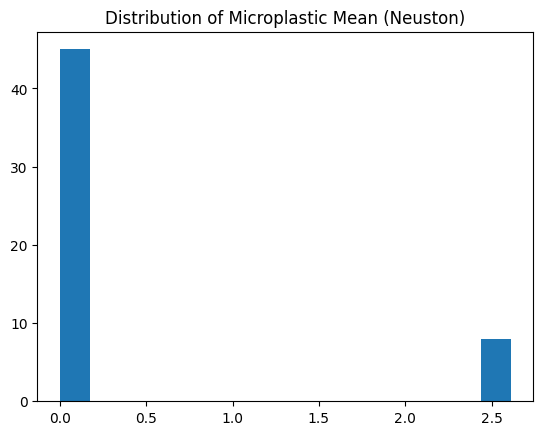

In [31]:
# Distribution Plot of Mean
plt.hist(neuston_df["Microplastic_Mean"], bins=15)
plt.title("Distribution of Microplastic Mean (Neuston)")
plt.show()

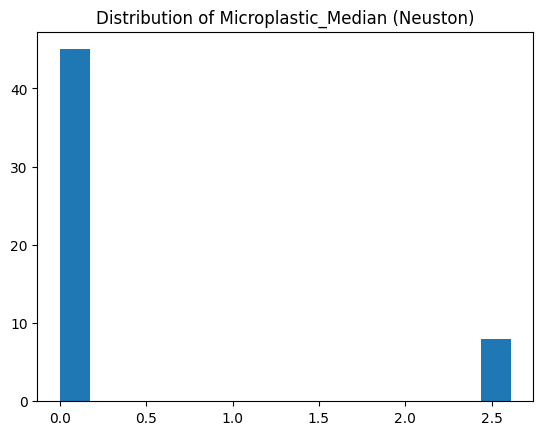

In [32]:
# Distribution Plot of Median
plt.hist(neuston_df["Microplastic_Median"], bins=15)
plt.title("Distribution of Microplastic_Median (Neuston)")
plt.show()

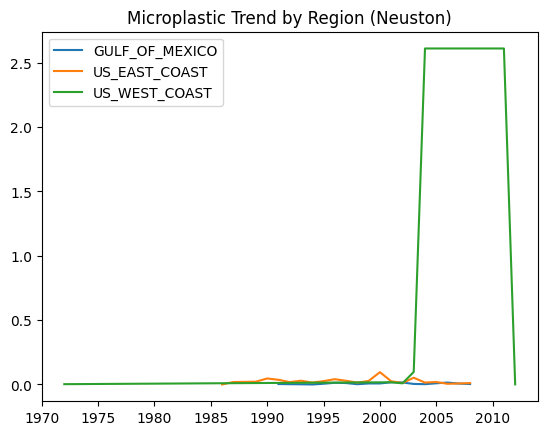

In [33]:
for region in neuston_df["Region"].unique():
    subset = neuston_df[neuston_df["Region"] == region]
    plt.plot(subset["Year"], subset["Microplastic_Mean"], label=region)

plt.legend()
plt.title("Microplastic Trend by Region (Neuston)")
plt.show()

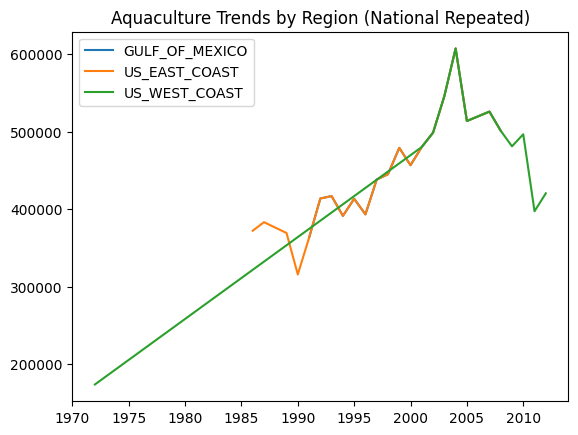

In [34]:
# Aquaculture production by region
for region in neuston_df["Region"].unique():
    subset = neuston_df[neuston_df["Region"] == region]
    plt.plot(subset["Year"], subset["Aquaculture_Production_Tonnes"], label=region)

plt.legend()
plt.title("Aquaculture Trends by Region (National Repeated)")
plt.show()

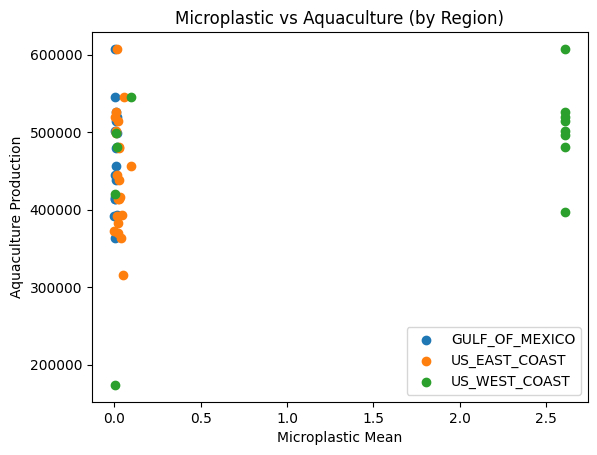

In [35]:
# Scatter plots by region
for region in neuston_df["Region"].unique():
    subset = neuston_df[neuston_df["Region"] == region]
    plt.scatter(
        subset["Microplastic_Mean"],
        subset["Aquaculture_Production_Tonnes"],
        label=region
    )

plt.legend()
plt.xlabel("Microplastic Mean")
plt.ylabel("Aquaculture Production")
plt.title("Microplastic vs Aquaculture (by Region)")
plt.show()

In [36]:
# Check for Outliers for Mean
print(neuston_df.sort_values("Microplastic_Mean", ascending=False).head(10))

           Region  Year Sampling Method  Microplastic_Mean  \
66  US_WEST_COAST  2006     Neuston net           2.611356   
65  US_WEST_COAST  2005     Neuston net           2.611356   
73  US_WEST_COAST  2011     Neuston net           2.611356   
72  US_WEST_COAST  2010     Neuston net           2.611356   
64  US_WEST_COAST  2004     Neuston net           2.611356   
70  US_WEST_COAST  2009     Neuston net           2.611356   
67  US_WEST_COAST  2007     Neuston net           2.611356   
68  US_WEST_COAST  2008     Neuston net           2.611356   
63  US_WEST_COAST  2003     Neuston net           0.097218   
41  US_EAST_COAST  2000     Neuston net           0.095669   

    Microplastic_Median  Total_Samples  Aquaculture_Production_Tonnes  
66             2.611356              2                       519967.0  
65             2.611356              2                       513920.0  
73             2.611356              3                       397392.0  
72             2.611356      

In [37]:
# Check for Outliers for Median
print(merged_df.sort_values("Microplastic_Median", ascending=False).head(10))

            Region  Year       Sampling Method  Microplastic_Mean  \
56   US_EAST_COAST  2020         Van Veen grab        2296.800000   
27  GULF_OF_MEXICO  2018          PVC cylinder        1274.530743   
26  GULF_OF_MEXICO  2017      Van Dorn sampler        1028.571429   
59   US_EAST_COAST  2021         Van Veen grab        1604.400000   
55   US_EAST_COAST  2020           Metal spoon         749.316324   
58   US_EAST_COAST  2021           Metal spoon        5950.000000   
25  GULF_OF_MEXICO  2017   Shipek grab sampler         278.888889   
54   US_EAST_COAST  2018  Intake seawater pump          33.500000   
22  GULF_OF_MEXICO  2016          Plankton net           4.483333   
24  GULF_OF_MEXICO  2017          Plankton net           4.563636   

    Microplastic_Median  Total_Samples  Aquaculture_Production_Tonnes  
56          2296.800000              2                     448619.606  
27          1058.413185            150                     471429.851  
26          1000.000000 

In [38]:
# Variance of Mean over Time and Region
print("Overall variance:", neuston_df["Microplastic_Mean"].var())
print("Between-region variance:", neuston_df.groupby("Region")["Microplastic_Mean"].mean().var())

Overall variance: 0.8786980112257917
Between-region variance: 0.8536897535902919


In [39]:
# Total variance
total_var = neuston_df["Microplastic_Median"].var()

# Between-region variance (using mean across time)
between_var = (
    neuston_df
    .groupby("Region")["Microplastic_Median"]
    .mean()
    .var()
)

# Within-region variance
within_var = (
    neuston_df
    .groupby("Region")["Microplastic_Median"]
    .var()
    .mean()
)

print("Total variance:", total_var)
print("Between-region variance:", between_var)
print("Within-region variance:", within_var)

Total variance: 0.8869752247418317
Between-region variance: 0.8666136047259907
Within-region variance: 0.5727845362809338


In [40]:
# Since we know there are 0 mean and medians, we inspect smallest
min_positive = neuston_df.loc[
    neuston_df["Microplastic_Mean"] > 0,
    "Microplastic_Mean"
].min()

print("Smallest positive microplastic mean:", min_positive)

Smallest positive microplastic mean: 0.000904


Chosen constant: 0.000452


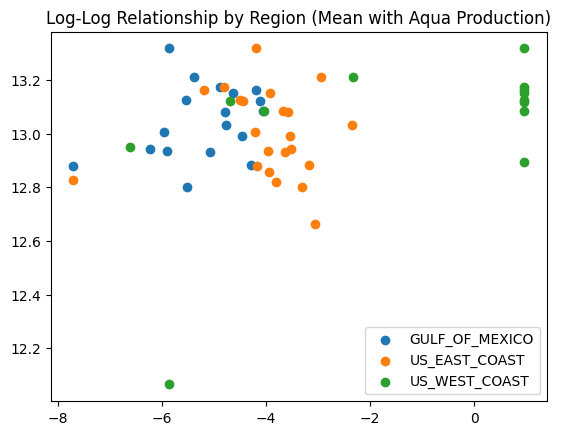

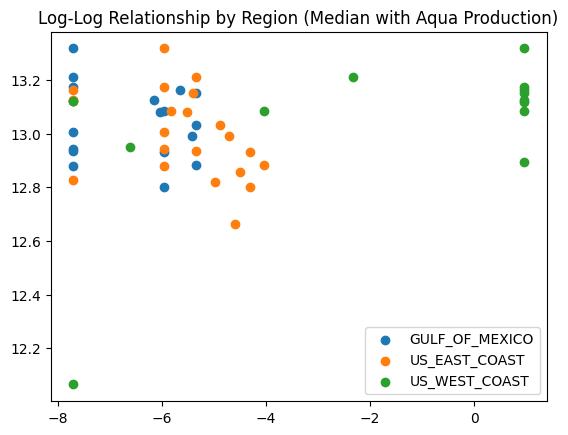

In [41]:
# Use half of smallest
c = min_positive / 2
print("Chosen constant:", c)

neuston_df["log_microplastic_mean"] = np.log(neuston_df["Microplastic_Mean"] + c)
neuston_df["log_microplastic_median"] = np.log(neuston_df["Microplastic_Median"] + c)
neuston_df["log_aquaculture"] = np.log(neuston_df["Aquaculture_Production_Tonnes"])

for region in neuston_df["Region"].unique():
    subset = neuston_df[neuston_df["Region"] == region]
    plt.scatter(subset["log_microplastic_mean"], subset["log_aquaculture"], label=region)

plt.legend()
plt.title("Log-Log Relationship by Region (Mean with Aqua Production)")
plt.show()

# Plot for median now
for region in neuston_df["Region"].unique():
    subset = neuston_df[neuston_df["Region"] == region]
    plt.scatter(subset["log_microplastic_median"], subset["log_aquaculture"], label=region)

plt.legend()
plt.title("Log-Log Relationship by Region (Median with Aqua Production)")
plt.show()

In [43]:
# Correlation MAtrix
print(neuston_df[[
    "Microplastic_Mean",
    "Aquaculture_Production_Tonnes"
]].corr())

print(neuston_df[[
    "log_microplastic_mean",
    "log_aquaculture"
]].corr())

                               Microplastic_Mean  \
Microplastic_Mean                       1.000000   
Aquaculture_Production_Tonnes           0.246783   

                               Aquaculture_Production_Tonnes  
Microplastic_Mean                                   0.246783  
Aquaculture_Production_Tonnes                       1.000000  
                       log_microplastic_mean  log_aquaculture
log_microplastic_mean               1.000000         0.271275
log_aquaculture                     0.271275         1.000000


## 3 Regression

In [46]:
from sklearn.linear_model import LinearRegression

# Simple log linear model
X = neuston_df[["log_microplastic_mean"]]
y = neuston_df["log_aquaculture"]

model = LinearRegression()
model.fit(X, y)

print("Intercept:", model.intercept_)
print("Gradient:", model.coef_[0])
print("R-square:", model.score(X, y))

Intercept: 13.111033026038974
Gradient: 0.02358061707743828
R-square: 0.07359018151601737


In [47]:
from sklearn.linear_model import LinearRegression

# Create region dummies
X = pd.get_dummies(
    neuston_df[["log_microplastic_mean", "Region"]],
    drop_first=True
)
y = neuston_df["log_aquaculture"]

model = LinearRegression()
model.fit(X, y)

print("Intercept:", model.intercept_)
print("Coefficients:", dict(zip(X.columns, model.coef_)))
print("R-square:", model.score(X, y))

Intercept: 13.27137746071052
Coefficients: {'log_microplastic_mean': np.float64(0.043581966611817895), 'Region_US_EAST_COAST': np.float64(-0.09868579249620597), 'Region_US_WEST_COAST': np.float64(-0.18399407261416556)}
R-square: 0.14922819375690888


**Insights**
- After viewing my datasets, I think it will be ideal to combine

In [ ]:
# # Moving to Dataset 2
# aquaculture_prod_df = pd.read_csv("./datasets/global_production_quantity.csv")

# # Ensure Year and production is numeric
# aquaculture_prod_df["Year"] = pd.to_numeric(aquaculture_prod_df["Year"], errors="coerce")

# aquaculture_prod_df["Global production by production source Quantity (1950 - 2023) Value value"] = pd.to_numeric(
#     aquaculture_prod_df["Global production by production source Quantity (1950 - 2023) Value value"],
#     errors="coerce"
# )

# # Keep the following 4 cols and rename them if needed
# aquaculture_prod_df = aquaculture_prod_df[[
#     "Country Name En",
#     "Year",
#     "Global production by production source Quantity (1950 - 2023) Value value",
#     "Global production by production source Quantity (1950 - 2023) Value flag"
# ]].rename(columns={
#     "Country Name En": "Country",
#     "Global production by production source Quantity (1950 - 2023) Value value": "Aquaculture Production (Tonnes)",
#     "Global production by production source Quantity (1950 - 2023) Value flag": "Production Flag"
# })

# print("Number of Rows:", len(aquaculture_prod_df))
# print(aquaculture_prod_df["Year"].unique())

# test = aquaculture_prod_df[
#     aquaculture_prod_df["Country"] == "United States of America"
# ]

# print("Number of Rows:", len(test))
# test.head()
